<a href="https://colab.research.google.com/github/davidlealo/diplomadodatascienceuc2023/blob/main/Ayudant%C3%ADa_16_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistemas de Recomendación
### Diplomado en Data Science

#### Bladimir Morales
---

Los sistemas de recomendación son un eje vital para prestadores de servicios como *Spotify* y *Netflix*, en donde su negocio está concentrado en las suscripciones de usuarios. Los sistemas de recomendación precisos ayudan a mejorar la experiencia de usuario y fortaceler la fidelidad de estos.

Utilizaremos un fragmento de la base de datos que Netflix disponibilizó en el año 2009 para una competencia de sistemas de recomendación. Los ganadores fueron premiados con US $1,000,000.

Se pide realizar :

(a) Análisis exploratorio de los datos

(b) Implementar un sistema de recomendación

(c) Medida de performance


In [ ]:
#%conda install pandas
import pandas as pd

ratings = pd.read_csv("https://raw.githubusercontent.com/bladimir-morales/ayudantias_python/main/movies%20(2).csv")
display(ratings.head())
print("Dimensiones:", ratings.shape)

,Movie,U1,U2,U3,U4,U5,U6,U7,U8,U9,...,U934,U935,U936,U937,U938,U939,U940,U941,U942,U943
0,Toy Story,5,4,0,0,4,4,0,0,0,...,2,3,4,0,4,0,0,5,0,0
1,GoldenEye,3,0,0,0,3,0,0,0,0,...,4,0,0,0,0,0,0,0,0,5
2,Four Rooms,4,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
3,Get Shorty,3,0,0,0,0,0,5,0,0,...,5,0,0,0,0,0,2,0,0,0
4,Copycat,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dimensiones: (1682, 944)


<Axes: >

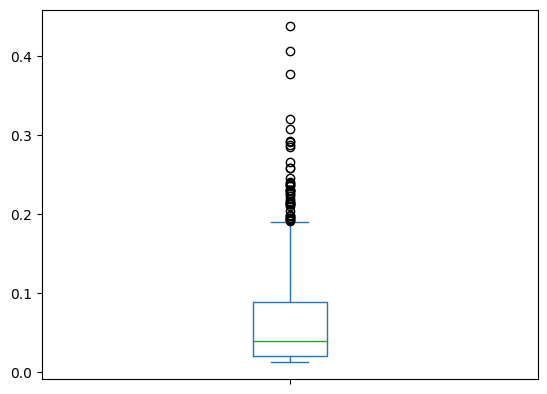

In [ ]:
pct_response = (ratings.iloc[:,1:]!=0).mean(axis=0)
pct_response.plot.box()

In [ ]:
ratings_large = ratings.melt(id_vars="Movie", var_name="User", value_name="Rating")
ratings_large

,Movie,User,Rating
0,Toy Story,U1,5
1,GoldenEye,U1,3
2,Four Rooms,U1,4
3,Get Shorty,U1,3
4,Copycat,U1,3
...,...,...,...
1586121,Mat' i syn,U943,0
1586122,B. Monkey,U943,0
1586123,Sliding Doors,U943,0
1586124,You So Crazy,U943,0


In [ ]:
ratings_obs = ratings_large.query("Rating > 0")[['User','Movie','Rating']]
ratings_unobs = ratings_large.query("Rating == 0")[['User','Movie','Rating']]

display(ratings_obs.head())
display(ratings_unobs.head())

,User,Movie,Rating
0,U1,Toy Story,5
1,U1,GoldenEye,3
2,U1,Four Rooms,4
3,U1,Get Shorty,3
4,U1,Copycat,3


,User,Movie,Rating
272,U1,Heat,0
273,U1,Sabrina,0
274,U1,Sense and Sensibility,0
275,U1,Leaving Las Vegas,0
276,U1,Restoration,0


In [ ]:
#%pip install scikit-surprise
from sklearn.model_selection import train_test_split
from surprise import Dataset, Reader

train, test = train_test_split(ratings_obs, test_size=0.1, random_state=2023)

reader = Reader(rating_scale=(1,5))
data_train = Dataset.load_from_df(df=train, reader =reader)

data_train.raw_ratings[:10]



[('U537', 'Mr. Smith Goes to Washington', 4.0, None),
 ('U325', 'Flintstones, The', 1.0, None),
 ('U916', 'Stand by Me', 3.0, None),
 ('U181', 'Liar Liar', 2.0, None),
 ('U235', 'Some Kind of Wonderful', 3.0, None),
 ('U670', 'Rear Window', 5.0, None),
 ('U454', 'Charade', 3.0, None),
 ('U85', 'Lion King, The', 4.0, None),
 ('U263', 'Mr. Smith Goes to Washington', 4.0, None),
 ('U847', 'Men in Black', 3.0, None)]

Implementación del modelo de sistema de recomendación

In [ ]:
import surprise.prediction_algorithms.knns as knns
sim_options = {"name": "cosine", "user_based":True}

model_knn = knns.KNNWithZScore(sim_options=sim_options, verbose=False)
model_knn.fit(data_train.build_full_trainset())


In [ ]:
sim_options = {"name": "pearson", "user_based":True}

model_knn2 = knns.KNNWithZScore(sim_options=sim_options, verbose=False)
model_knn2.fit(data_train.build_full_trainset())

In [ ]:
users_sim = pd.DataFrame(
    data = model_knn.sim,
    index = ratings.columns[1:],
    columns= ratings.columns[1:]
)
users_sim

,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10,...,U934,U935,U936,U937,U938,U939,U940,U941,U942,U943
U1,1.000000,0.957277,0.962464,0.807604,0.972092,0.940401,0.911700,0.963982,0.948295,0.894082,...,0.953840,0.868334,0.859547,0.816198,0.860163,0.961163,0.849908,0.965468,0.911733,0.956651
U2,0.957277,1.000000,0.949380,0.848643,0.963226,0.914533,0.894594,0.969948,0.929272,0.883502,...,0.998868,0.935819,0.892884,0.000000,0.952926,0.938500,0.000000,0.965568,0.977525,0.970143
U3,0.962464,0.949380,1.000000,0.794444,0.971440,0.942738,0.920044,0.965320,0.969416,0.926791,...,0.966092,0.962514,0.898322,0.791155,0.980581,0.994490,1.000000,0.982750,0.963960,0.994006
U4,0.807604,0.848643,0.794444,1.000000,0.894655,0.964901,0.861644,0.827157,0.928117,0.857027,...,0.866428,0.924499,0.898117,0.846546,0.888142,0.903851,0.870572,0.777593,0.853001,0.812273
U5,0.972092,0.963226,0.971440,0.894655,1.000000,0.949398,0.936879,0.980923,0.985076,0.961943,...,1.000000,0.990992,0.928024,1.000000,0.000000,0.989949,0.894427,0.996082,0.989949,0.993809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U939,0.961163,0.938500,0.994490,0.903851,0.989949,0.000000,0.954278,0.977255,0.935381,1.000000,...,0.000000,0.978709,0.943210,0.860632,0.944263,1.000000,0.972518,0.970143,0.989752,0.000000
U940,0.849908,0.000000,1.000000,0.870572,0.894427,0.000000,0.970725,1.000000,1.000000,1.000000,...,0.919145,0.991837,0.952926,0.994505,0.973668,0.972518,1.000000,1.000000,0.989949,0.000000
U941,0.965468,0.965568,0.982750,0.777593,0.996082,1.000000,0.973437,0.987393,0.992137,0.873660,...,0.999512,0.980723,0.993884,0.863789,0.999512,0.970143,1.000000,1.000000,0.992781,0.000000
U942,0.911733,0.977525,0.963960,0.853001,0.989949,0.000000,0.951737,0.974835,0.966092,1.000000,...,0.991837,0.971575,0.964764,0.932550,0.981895,0.989752,0.989949,0.992781,1.000000,1.000000


In [ ]:
users_sim2 = pd.DataFrame(
    data = model_knn2.sim,
    index = ratings.columns[1:],
    columns= ratings.columns[1:]
)
users_sim2

,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10,...,U934,U935,U936,U937,U938,U939,U940,U941,U942,U943
U1,1.000000,0.425057,0.482859,-0.001742,0.481783,-0.154896,0.032079,0.464626,0.303449,0.049373,...,0.802090,-0.006376,0.109228,-0.288874,0.150530,0.414284,-0.419371,0.554393,0.131538,0.320513
U2,0.425057,1.000000,0.180791,0.075089,0.247031,-0.178871,-0.282822,0.331725,-0.179788,-0.113916,...,1.000000,-0.188982,-1.000000,0.000000,-1.000000,-0.500000,0.000000,0.241523,0.522233,0.000000
U3,0.482859,0.180791,1.000000,-0.138790,0.295622,-0.023443,-0.038083,0.182000,0.237418,0.090573,...,0.838628,0.494881,0.376051,-0.944911,0.000000,0.942809,0.000000,-0.185695,0.654654,0.790569
U4,-0.001742,0.075089,-0.138790,1.000000,0.216845,0.000000,0.088170,-0.230812,0.373145,0.395615,...,0.115148,0.235277,0.421754,0.098379,0.213913,0.414781,0.063010,-0.413585,0.123605,-0.517030
U5,0.481783,0.247031,0.295622,0.216845,1.000000,-0.069171,-0.086401,0.390840,0.370828,0.092502,...,0.000000,1.000000,-0.866025,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U939,0.414284,-0.500000,0.942809,0.414781,0.000000,0.000000,0.144338,0.668648,-0.045835,1.000000,...,0.000000,0.000000,0.207514,-0.739940,0.000000,1.000000,0.944911,0.000000,0.790569,0.000000
U940,-0.419371,0.000000,0.000000,0.063010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,0.944911,1.000000,0.000000,0.000000,0.000000
U941,0.554393,0.241523,-0.185695,-0.413585,0.666667,0.000000,0.601338,0.377010,0.907959,-0.801784,...,1.000000,0.327327,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.866025,0.000000
U942,0.131538,0.522233,0.654654,0.123605,0.000000,0.000000,0.294174,0.000000,0.738549,0.000000,...,0.000000,-0.790569,0.366900,-0.373364,0.416667,0.790569,0.000000,0.866025,1.000000,0.000000


In [ ]:
print("Usuarios más similares al Usuario 2:")
print(users_sim['U2'].sort_values(ascending=False).head())

print("\n Usuarios menos similares al Usuario 2:")
print(users_sim['U2'].sort_values(ascending=True).head())

Usuarios más similares al Usuario 2:
U669    1.0
U849    1.0
U702    1.0
U897    1.0
U710    1.0
Name: U2, dtype: float64

 Usuarios menos similares al Usuario 2:
U92     0.0
U521    0.0
U933    0.0
U488    0.0
U482    0.0
Name: U2, dtype: float64


In [ ]:
print("Usuarios más similares al Usuario 2:")
print(users_sim2['U2'].sort_values(ascending=False).head())

print("\n Usuarios menos similares al Usuario 2:")
print(users_sim2['U2'].sort_values(ascending=True).head())

Usuarios más similares al Usuario 2:
U901    1.0
U873    1.0
U630    1.0
U622    1.0
U909    1.0
Name: U2, dtype: float64

 Usuarios menos similares al Usuario 2:
U585   -1.0
U884   -1.0
U450   -1.0
U821   -1.0
U892   -1.0
Name: U2, dtype: float64


Predicción

In [ ]:
test

,User,Movie,Rating
995084,U592,Fathers' Day,1
170063,U102,GoodFellas,3
1569878,U934,Body Snatchers,2
521515,U311,Terminator 2: Judgment Day,5
635911,U379,Cold Comfort Farm,4
...,...,...,...
1202809,U716,Apocalypse Now,3
582398,U347,To Kill a Mockingbird,4
303219,U181,"Crossing Guard, The",1
469592,U280,Apt Pupil,5


In [ ]:
prediccion_knn = model_knn.predict(uid='U102', iid = 'GoodFellas')
prediccion_knn2 = model_knn2.predict(uid='U102', iid = 'GoodFellas')
print('Calificación predicha con KNN cos:', prediccion_knn.est)
print('Calificación predicha con KNN pearson:', prediccion_knn2.est)
print('Calificación real:', test.iloc[1,2])

Calificación predicha con KNN cos: 2.8166312012040726
Calificación predicha con KNN pearson: 2.815764753987079
Calificación real: 3


In [ ]:
def prediccion_rating(modelo, usuario, item):
    prediccion= modelo.predict(uid=usuario, iid=item)
    return prediccion.est

In [ ]:
test['KNNPrediction_cos']= test.apply(
    func = lambda df: prediccion_rating(model_knn,df['User'], df['Movie']),
    axis=1
)
test['KNNPrediction_pearson']= test.apply(
    func = lambda df: prediccion_rating(model_knn2,df['User'], df['Movie']),
    axis=1
)

In [ ]:
test.head()

,User,Movie,Rating,KNNPrediction_cos,KNNPrediction_pearson
995084,U592,Fathers' Day,1,2.627156,2.487166
170063,U102,GoodFellas,3,2.816631,2.815765
1569878,U934,Body Snatchers,2,3.398463,3.424370
521515,U311,Terminator 2: Judgment Day,5,4.301804,4.468611
635911,U379,Cold Comfort Farm,4,3.983647,4.170433


In [ ]:
from sklearn.metrics import mean_squared_error

rmse_knn= mean_squared_error(test['Rating'], test['KNNPrediction_cos'], squared=False)
rmse_knn2= mean_squared_error(test['Rating'], test['KNNPrediction_pearson'], squared=False)

print('RMSE modelo KNN cos:', rmse_knn)
print('RMSE modelo KNN pearson', rmse_knn2)

RMSE modelo KNN cos: 0.9505071058749819
RMSE modelo KNN pearson 0.9438781705827687


Validación Cruzada

In [ ]:
from surprise.model_selection import KFold, cross_validate

kfold= KFold(n_splits=5, shuffle=True , random_state=2023)

In [ ]:
model_knn_cv = cross_validate(
    algo = model_knn,
    data = data_train,
    measures = ['rmse'],
    cv= kfold,
    n_jobs = -1,
    verbose =False
)

In [ ]:
model_knn2_cv = cross_validate(
    algo = model_knn2,
    data = data_train,
    measures = ['rmse'],
    cv= kfold,
    n_jobs = -1,
    verbose =False
)

In [ ]:
%%time
from surprise.model_selection import GridSearchCV

knn_hp = {
    "k" : [10, 30, 50],
    "min_k": [1, 5],
    "sim_options": {
        "user_based": [True, False],
        "name": ["pearson", "cosine"]
    }
}

models = GridSearchCV(
    algo_class = knns.KNNWithZScore,
    param_grid = knn_hp,
    measures   = ["rmse"],
    cv         = kfold,
    n_jobs     = -1
)
models.fit(data_train)

CPU times: total: 19.7 s
Wall time: 3min 7s


In [ ]:
print('Mejor RMSE:', models.best_score['rmse'])

Mejor RMSE: 0.9454917896194386


In [ ]:
print('Mejores hiperparámetros:', models.best_params['rmse'])

Mejores hiperparámetros: {'k': 50, 'min_k': 1, 'sim_options': {'user_based': False, 'name': 'pearson'}}


In [ ]:
best_knn = models.best_estimator['rmse'].fit(data_train.build_full_trainset())

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [ ]:
item_sim = pd.DataFrame(data=best_knn.sim)
item_sim

,0,1,2,3,4,5,6,7,8,9,...,1629,1630,1631,1632,1633,1634,1635,1636,1637,1638
0,1.000000,-0.437621,0.036500,0.107253,0.016523,0.211611,0.370306,0.104705,-0.171643,-0.236433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.437621,1.000000,0.041345,0.278243,0.759257,0.301511,-0.500000,0.356652,0.511686,0.970725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.036500,0.041345,1.000000,0.071197,0.321142,0.223651,0.388909,0.167187,0.004481,0.443716,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.107253,0.278243,0.071197,1.000000,0.277761,0.253011,0.074296,0.287000,0.328389,0.143600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.016523,0.759257,0.321142,0.277761,1.000000,0.275278,0.866025,0.366519,0.077322,-0.727607,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1635,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1637,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
test['BestModelPrediction']=test.apply(
    func =lambda df: prediccion_rating(best_knn,df['User'],df['Movie']),
    axis=1
)

rmse_best_model = mean_squared_error(test['Rating'], test['BestModelPrediction'],squared=False)

In [ ]:
print('RMSE modelo KNN cos:', rmse_knn)
print('RMSE modelo KNN pearson:', rmse_knn2)
print('RMSE modelo óptimo:', rmse_best_model)

RMSE modelo KNN cos: 0.9505071058749819
RMSE modelo KNN pearson: 0.9438781705827687
RMSE modelo óptimo: 0.933721106752163


Recordemos que para decidir que tan bueno es un ajuste, no solo debemos considerar la métrica obtenida, también debemos estudiar los costos y ganancias que producen las predicciones.

In [ ]:
%%time
ratings_unobs['Prediction']= ratings_unobs.apply(
    func = lambda df: prediccion_rating(best_knn, df['User'], df['Movie']),
    axis=1
)

CPU times: total: 2min 1s
Wall time: 4min 18s


Por ejemplo, podemos ver las películas que obtendrían las mejores calificaciones para el Usuario 2. Estas eventualmente podrían ser las recomendaciones que le mostraríamos al usuario.

In [ ]:
ratings_unobs.query("User == 'U2'").sort_values('Prediction', ascending=False).head(15)

,User,Movie,Rating,Prediction
3181,U2,Santa with Muscles,0,5.000000
3148,U2,"Saint of Fort Washington, The",0,5.000000
3193,U2,"World of Apu, The (Apur Sansar)",0,5.000000
3337,U2,Little City,0,5.000000
2870,U2,Prefontaine,0,5.000000
3280,U2,Someone Else's America,0,5.000000
2803,U2,They Made Me a Criminal,0,5.000000
3217,U2,Aiqing wansui,0,5.000000
3334,U2,Entertaining Angels: The Dorothy Day Story,0,5.000000
2495,U2,"Great Day in Harlem, A",0,5.000000
